In [1]:
import os
import sys
from collections import OrderedDict
sys.path.append("../..")
import spatialpy
spatialpy.__file__
import matplotlib.pyplot as plt
import numpy
%load_ext autoreload
%autoreload 2

In [2]:
class All(spatialpy.Geometry):
    def inside(self, x, on_boundary):
        return True

class Left(spatialpy.Geometry):
    def inside(self, x, on_boundary):
        if x[0] >= 0:
            return True
        return False

class Right(spatialpy.Geometry):
    def inside(self, x, on_boundary):
        if x[0] < 0:
            return True
        return False


In [3]:
class Diffreactdebugtest(spatialpy.Model):

    def __init__(self, model_name="diffreact_debug_test"):
        spatialpy.Model.__init__(self, model_name)

        D_const = 0.01

        # Species
        A = spatialpy.Species(name="A", diffusion_constant=D_const)
        self.add_species([A])

        # Mesh
        self.mesh = spatialpy.Mesh.create_2D_domain(
            xlim=[-1, 1], ylim=[-1, 1], nx=50, ny=50, type_id=1.0, 
            mass=1.0, nu=1.0, fixed=True,  rho0=1.0, c0=1.0, P0=1.0
        )

        # Subdomains
        self.set_type(Left(), 1, mass=1.0, fixed=True)
        self.set_type(Right(), 2, mass=1.0, fixed=True)

        # Parameter
        Rate1 = spatialpy.Parameter("Rate1", expression=100)

        # Reactions
        R1 = spatialpy.Reaction(name="R1", reactants={}, products={A:1}, rate=Rate1, restrict_to=1)
        R2 = spatialpy.Reaction(name="R2", reactants={A:1}, products={}, rate=Rate1, restrict_to=2)

        # Initial condition
        #self.add_initial_condition(spatialpy.PlaceInitialCondition(A, 1000, [0,0,0]))

        # Time
        self.timestep_size=0.1
        self.num_timesteps=10
        self.output_freq=1

In [4]:
model = Diffreactdebugtest()

totalvolume 4


In [5]:
from spatialpy import Solver
sol = Solver(model, debug_level=0)
sol.compile()
%time result = sol.run()

CPU times: user 0 ns, sys: 2.89 ms, total: 2.89 ms
Wall time: 106 ms


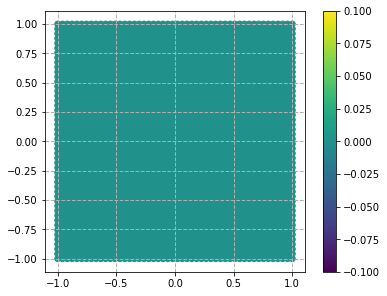

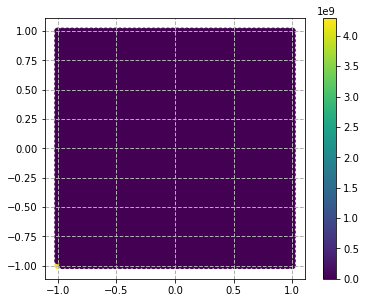

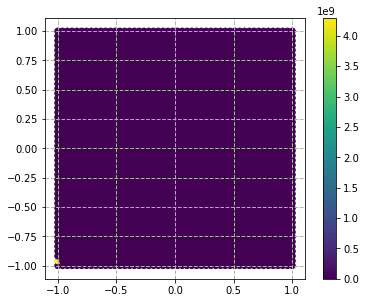

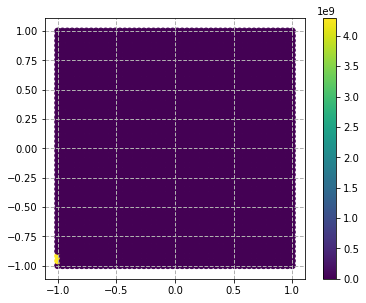

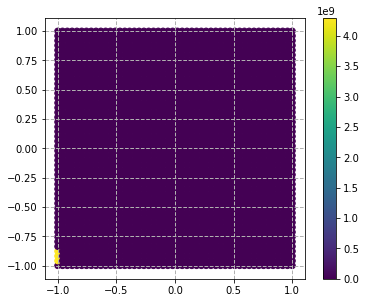

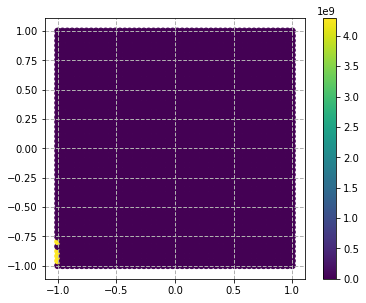

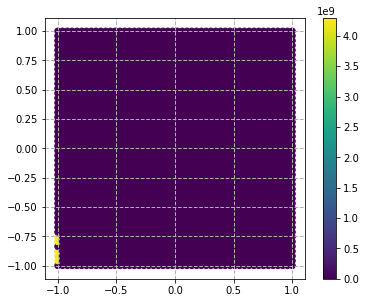

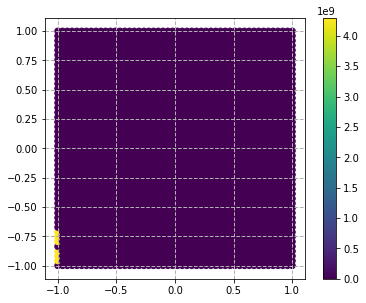

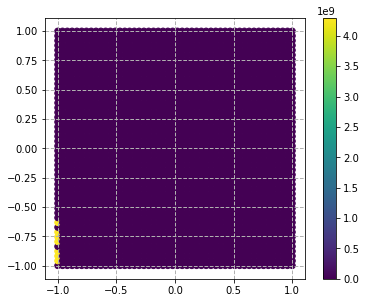

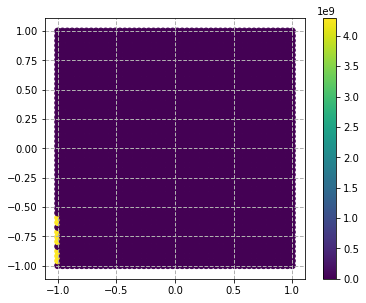

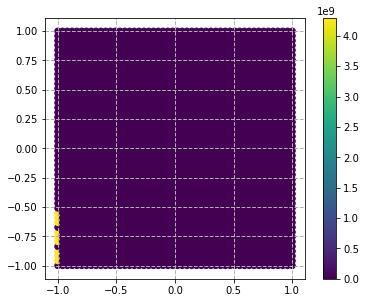

In [6]:
for i,t in enumerate(result.get_timespan()):
    #print(i,t)
    result.plot_species("A", i, use_matplotlib=True, debug=False)